# Exploitation Comparison of Different Zero-sum Game Methods
The figures show the learning curve of the exploiter after the model is trained with different type of methods. The exploiter is set as the second player for all envs and methods.

In [1]:
import json
import os, re

def load_data(file_name):
    file_dir = folder+files[0]
    file_dir = folder+file_name
    # print(file_dir)
    
    data = json.load( open(file_dir+"/eval.json"))
    # print(data.keys())
    return data

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['savefig.facecolor']='white'
# plt.style.use('seaborn-whitegrid')
plt.style.use('default')
import matplotlib.cm as cm


def plot(x, data, method, color, agent_to_plot, smooth_radius=200, range=100000):
    def smooth(y, radius=200, mode='two_sided'):
        if len(y) < 2*radius+1:
            return np.ones_like(y) * y.mean()
        elif mode == 'two_sided':
            convkernel = np.ones(2 * radius+1)
            return np.convolve(y, convkernel, mode='same') / \
                   np.convolve(np.ones_like(y), convkernel, mode='same')
        elif mode == 'causal':
            convkernel = np.ones(radius)
            out = np.convolve(y, convkernel,mode='full') / \
                  np.convolve(np.ones_like(y), convkernel, mode='full')
            return out[:-radius+1]

    k = method
    v = data[agent_to_plot]
    try:
        plt.plot(x, v[:range], color=color, alpha=0.2)
        plt.plot(x, smooth(v[:range], radius=smooth_radius), color=color, label=k)
    except:
        pass


['pettingzoo_boxing_v1_fictitious_selfplay2', 'pettingzoo_boxing_v1_nash_ppo', 'pettingzoo_boxing_v1_nfsp', 'pettingzoo_boxing_v1_nxdo2', 'pettingzoo_boxing_v1_selfplay2', 'pettingzoo_ice_hockey_v1_fictitious_selfplay2', 'pettingzoo_ice_hockey_v1_nash_ppo', 'pettingzoo_ice_hockey_v1_nfsp', 'pettingzoo_ice_hockey_v1_selfplay2', 'pettingzoo_pong_v2_fictitious_selfplay2', 'pettingzoo_pong_v2_nash_ppo', 'pettingzoo_pong_v2_nfsp', 'pettingzoo_pong_v2_nxdo2', 'pettingzoo_pong_v2_selfplay2', 'pettingzoo_tennis_v2_fictitious_selfplay2', 'pettingzoo_tennis_v2_nash_ppo', 'pettingzoo_tennis_v2_nfsp', 'pettingzoo_tennis_v2_nxdo2', 'pettingzoo_tennis_v2_selfplay2', 'slimevolley_SlimeVolley-v0_fictitious_selfplay2', 'slimevolley_SlimeVolley-v0_nash_ppo', 'slimevolley_SlimeVolley-v0_nfsp', 'slimevolley_SlimeVolley-v0_nxdo2', 'slimevolley_SlimeVolley-v0_selfplay2']
['pettingzoo_tennis_v2_fictitious_selfplay2', 'pettingzoo_tennis_v2_nash_ppo', 'pettingzoo_tennis_v2_nfsp', 'pettingzoo_tennis_v2_nxdo2', 

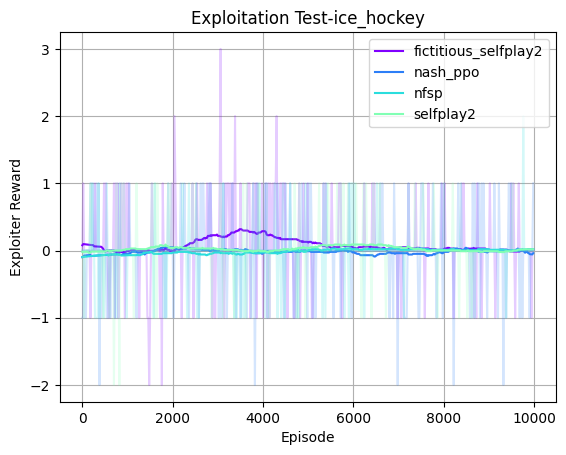

In [7]:

envs = ['tennis', 'slimevolley', 'boxing', 'pong', 'ice_hockey']
index = '20220421_1855'
exploited_models = ['first', 'second']
for exploited_model in exploited_models:
    os.makedirs(f'{index}_exploit/{exploited_model}', exist_ok=True)
    folder = f'../data/log/{index}_exploit_{exploited_model}/'
    files = ! ls $folder
    print(files)
    colors = cm.rainbow(np.linspace(0, 1, 7))
    # colors = ['r', 'b', 'c', 'orange', 'g', 'grey']
    if exploited_model == 'first':
        agent_to_plot = 'second_0'  # 'first_0' or 'second_0'
    else:
        agent_to_plot = 'first_0'

    for env in envs:
        env_files =[f for f in files if env in f]
        print(env_files)

        plt.clf()
        for f, c in zip(env_files, colors):
            data = load_data(f)

            method = re.split('v(\d+)_', f)[-1] # split with 'v*'
            plot(data['episode'], data['episode_reward'], method, c, agent_to_plot, smooth_radius=50)

        plt.legend()
        plt.grid()
        plt.title(f'Exploitation Test-{env}')
        plt.xlabel('Episode')
        plt.ylabel('Exploiter Reward')
        savepath=f'{index}_exploit/{exploited_model}/compare_exploitation_{env}.png'
        plt.savefig(savepath, bbox_inches='tight',)

['pettingzoo_boxing_v1_nash_dqn', 'pettingzoo_boxing_v1_nash_dqn_exploiter', 'pettingzoo_ice_hockey_v1_nash_dqn', 'pettingzoo_ice_hockey_v1_nash_dqn_exploiter', 'pettingzoo_pong_v2_nash_dqn', 'pettingzoo_pong_v2_nash_dqn_exploiter', 'pettingzoo_tennis_v2_nash_dqn', 'pettingzoo_tennis_v2_nash_dqn_exploiter', 'slimevolley_SlimeVolley-v0_nash_dqn', 'slimevolley_SlimeVolley-v0_nash_dqn_exploiter']
['pettingzoo_tennis_v2_nash_dqn', 'pettingzoo_tennis_v2_nash_dqn_exploiter']
['slimevolley_SlimeVolley-v0_nash_dqn', 'slimevolley_SlimeVolley-v0_nash_dqn_exploiter']
['pettingzoo_boxing_v1_nash_dqn', 'pettingzoo_boxing_v1_nash_dqn_exploiter']
['pettingzoo_pong_v2_nash_dqn', 'pettingzoo_pong_v2_nash_dqn_exploiter']
['pettingzoo_ice_hockey_v1_nash_dqn', 'pettingzoo_ice_hockey_v1_nash_dqn_exploiter']
['pettingzoo_boxing_v1_nash_dqn', 'pettingzoo_boxing_v1_nash_dqn_exploiter', 'pettingzoo_ice_hockey_v1_nash_dqn', 'pettingzoo_ice_hockey_v1_nash_dqn_exploiter', 'pettingzoo_pong_v2_nash_dqn', 'pettingzo

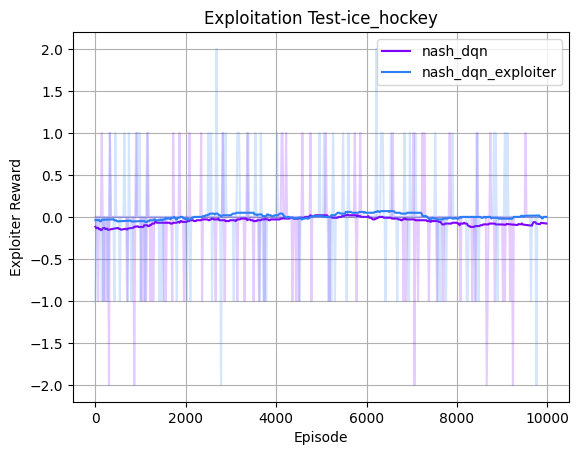

In [8]:
import os

envs = ['tennis', 'slimevolley', 'boxing', 'pong', 'ice_hockey']
index = '20220421_1859'
exploited_models = ['first', 'second']
for exploited_model in exploited_models:
    os.makedirs(f'{index}_exploit/{exploited_model}', exist_ok=True)
    folder = f'../data/log/{index}_exploit_{exploited_model}/'
    files = ! ls $folder
    print(files)
    colors = cm.rainbow(np.linspace(0, 1, 7))
    # colors = ['r', 'b', 'c', 'orange', 'g', 'grey']
    if exploited_model == 'first':
        agent_to_plot = 'second_0'  # 'first_0' or 'second_0'
    else:
        agent_to_plot = 'first_0'

    for env in envs:
        env_files =[f for f in files if env in f]
        print(env_files)

        plt.clf()
        for f, c in zip(env_files, colors):
            data = load_data(f)
            method = re.split('v(\d+)_', f)[-1] # split with 'v*'
            plot(data['episode'], data['episode_reward'], method, c, agent_to_plot, smooth_radius=50)

        plt.legend()
        plt.grid()
        plt.title(f'Exploitation Test-{env}')
        plt.xlabel('Episode')
        plt.ylabel('Exploiter Reward')
        savepath=f'{index}_exploit/{exploited_model}/compare_exploitation_{env}.png'
        plt.savefig(savepath, bbox_inches='tight',)

['pettingzoo_boxing_v1_nash_dqn', 'pettingzoo_boxing_v1_nash_dqn_exploiter', 'pettingzoo_ice_hockey_v1_nash_dqn', 'pettingzoo_ice_hockey_v1_nash_dqn_exploiter', 'pettingzoo_pong_v2_nash_dqn', 'pettingzoo_pong_v2_nash_dqn_exploiter', 'pettingzoo_tennis_v2_nash_dqn', 'pettingzoo_tennis_v2_nash_dqn_exploiter', 'slimevolley_SlimeVolley-v0_nash_dqn', 'slimevolley_SlimeVolley-v0_nash_dqn_exploiter']
['pettingzoo_tennis_v2_nash_dqn', 'pettingzoo_tennis_v2_nash_dqn_exploiter']
['slimevolley_SlimeVolley-v0_nash_dqn', 'slimevolley_SlimeVolley-v0_nash_dqn_exploiter']
['pettingzoo_boxing_v1_nash_dqn', 'pettingzoo_boxing_v1_nash_dqn_exploiter']
['pettingzoo_pong_v2_nash_dqn', 'pettingzoo_pong_v2_nash_dqn_exploiter']
['pettingzoo_ice_hockey_v1_nash_dqn', 'pettingzoo_ice_hockey_v1_nash_dqn_exploiter']
['pettingzoo_boxing_v1_nash_dqn', 'pettingzoo_boxing_v1_nash_dqn_exploiter', 'pettingzoo_ice_hockey_v1_nash_dqn', 'pettingzoo_ice_hockey_v1_nash_dqn_exploiter', 'pettingzoo_pong_v2_nash_dqn', 'pettingzo

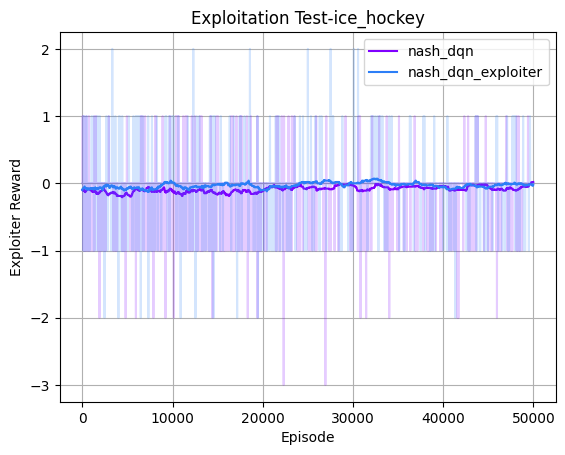

In [10]:
import os

envs = ['tennis', 'slimevolley', 'boxing', 'pong', 'ice_hockey']
index = '20220421_1859'
exploited_models = ['first', 'second']
for exploited_model in exploited_models:
    os.makedirs(f'{index}_exploit_50000/{exploited_model}', exist_ok=True)
    folder = f'../data/log/{index}_exploit_{exploited_model}_50000/'
    files = ! ls $folder
    print(files)
    colors = cm.rainbow(np.linspace(0, 1, 7))
    # colors = ['r', 'b', 'c', 'orange', 'g', 'grey']
    if exploited_model == 'first':
        agent_to_plot = 'second_0'  # 'first_0' or 'second_0'
    else:
        agent_to_plot = 'first_0'

    for env in envs:
        env_files =[f for f in files if env in f]
        print(env_files)

        plt.clf()
        for f, c in zip(env_files, colors):
            data = load_data(f)
            method = re.split('v(\d+)_', f)[-1] # split with 'v*'
            plot(data['episode'], data['episode_reward'], method, c, agent_to_plot, smooth_radius=50)

        plt.legend()
        plt.grid()
        plt.title(f'Exploitation Test-{env}')
        plt.xlabel('Episode')
        plt.ylabel('Exploiter Reward')
        savepath=f'{index}_exploit_50000/{exploited_model}/compare_exploitation_{env}.png'
        plt.savefig(savepath, bbox_inches='tight',)

['pettingzoo_basketball_pong_v2_nash_dqn', 'pettingzoo_basketball_pong_v2_nash_dqn_exploiter', 'pettingzoo_double_dunk_v2_nash_dqn', 'pettingzoo_double_dunk_v2_nash_dqn_exploiter', 'pettingzoo_space_war_v1_nash_dqn', 'pettingzoo_space_war_v1_nash_dqn_exploiter', 'pettingzoo_surround_v1_nash_dqn', 'pettingzoo_surround_v1_nash_dqn_exploiter']
['pettingzoo_double_dunk_v2_nash_dqn', 'pettingzoo_double_dunk_v2_nash_dqn_exploiter']
['pettingzoo_space_war_v1_nash_dqn', 'pettingzoo_space_war_v1_nash_dqn_exploiter']
['pettingzoo_surround_v1_nash_dqn', 'pettingzoo_surround_v1_nash_dqn_exploiter']
['pettingzoo_basketball_pong_v2_nash_dqn', 'pettingzoo_basketball_pong_v2_nash_dqn_exploiter']
['pettingzoo_basketball_pong_v2_nash_dqn', 'pettingzoo_basketball_pong_v2_nash_dqn_exploiter', 'pettingzoo_double_dunk_v2_nash_dqn', 'pettingzoo_double_dunk_v2_nash_dqn_exploiter', 'pettingzoo_space_war_v1_nash_dqn', 'pettingzoo_space_war_v1_nash_dqn_exploiter', 'pettingzoo_surround_v1_nash_dqn', 'pettingzoo_s

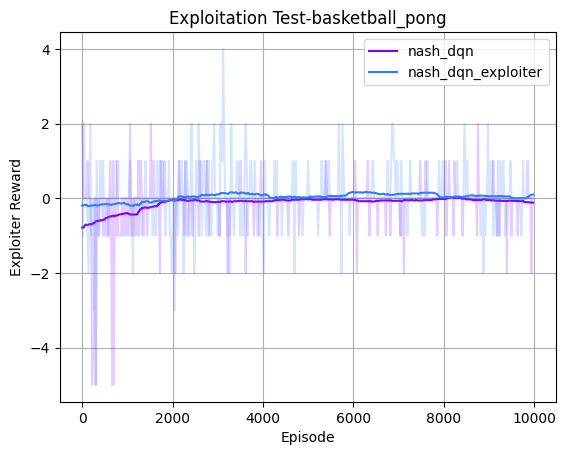

In [14]:
import os

envs = ['double_dunk', 'space_war', 'surround', 'basketball_pong']
index = '20220425_1806'
exploited_models = ['first', 'second']
for exploited_model in exploited_models:
    os.makedirs(f'{index}_exploit/{exploited_model}', exist_ok=True)
    folder = f'../data/log/{index}_exploit_{exploited_model}/'
    files = ! ls $folder
    print(files)
    colors = cm.rainbow(np.linspace(0, 1, 7))
    # colors = ['r', 'b', 'c', 'orange', 'g', 'grey']
    if exploited_model == 'first':
        agent_to_plot = 'second_0'  # 'first_0' or 'second_0'
    else:
        agent_to_plot = 'first_0'

    for env in envs:
        env_files =[f for f in files if env in f]
        print(env_files)

        plt.clf()
        for f, c in zip(env_files, colors):
            data = load_data(f)
            method = re.split('v(\d+)_', f)[-1] # split with 'v*'
            plot(data['episode'], data['episode_reward'], method, c, agent_to_plot, smooth_radius=50)

        plt.legend()
        plt.grid()
        plt.title(f'Exploitation Test-{env}')
        plt.xlabel('Episode')
        plt.ylabel('Exploiter Reward')
        savepath=f'{index}_exploit/{exploited_model}/compare_exploitation_{env}.png'
        plt.savefig(savepath, bbox_inches='tight',)

['pettingzoo_boxing_v1_fictitious_selfplay2', 'pettingzoo_boxing_v1_nash_dqn', 'pettingzoo_boxing_v1_nash_dqn_exploiter', 'pettingzoo_boxing_v1_nash_ppo', 'pettingzoo_boxing_v1_nfsp', 'pettingzoo_boxing_v1_nxdo2', 'pettingzoo_boxing_v1_selfplay2', 'pettingzoo_double_dunk_v2_fictitious_selfplay2', 'pettingzoo_double_dunk_v2_nash_dqn', 'pettingzoo_double_dunk_v2_nash_dqn_exploiter', 'pettingzoo_double_dunk_v2_nash_ppo', 'pettingzoo_double_dunk_v2_nfsp', 'pettingzoo_double_dunk_v2_selfplay2', 'pettingzoo_pong_v2_fictitious_selfplay2', 'pettingzoo_pong_v2_nash_dqn', 'pettingzoo_pong_v2_nash_dqn_exploiter', 'pettingzoo_pong_v2_nash_ppo', 'pettingzoo_pong_v2_nfsp', 'pettingzoo_pong_v2_nxdo2', 'pettingzoo_pong_v2_selfplay2', 'pettingzoo_surround_v1_fictitious_selfplay2', 'pettingzoo_surround_v1_nash_dqn', 'pettingzoo_surround_v1_nash_dqn_exploiter', 'pettingzoo_surround_v1_nash_ppo', 'pettingzoo_surround_v1_nfsp', 'pettingzoo_surround_v1_nxdo2', 'pettingzoo_surround_v1_selfplay2', 'pettingzoo

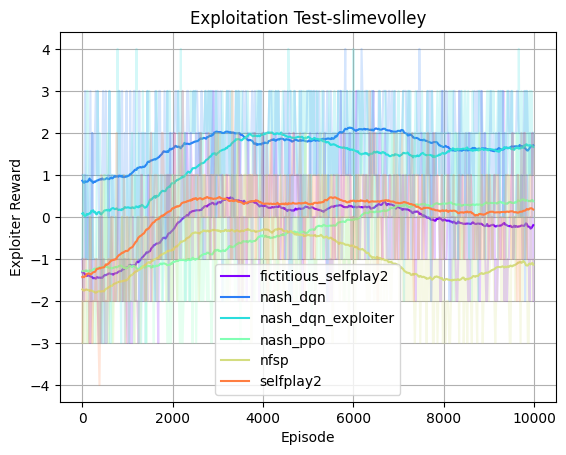

In [5]:
import os

envs = ['double_dunk', 'boxing', 'surround', 'pong', 'tennis', 'slimevolley']
index = '20220429_0152'
exploited_models = ['first', 'second']
times=  ['1']
for exploited_model in exploited_models:
    for t in times:
        os.makedirs(f'{index}_exploit/{exploited_model}_{t}', exist_ok=True)
        folder = f'../data/log/{index}_exploit_{exploited_model}_{t}/'
        files = ! ls $folder
        print(files)
        colors = cm.rainbow(np.linspace(0, 1, 7))
        # colors = ['r', 'b', 'c', 'orange', 'g', 'grey']
        if exploited_model == 'first':
            agent_to_plot = 'second_0'  # 'first_0' or 'second_0'
        else:
            agent_to_plot = 'first_0'

        for env in envs:
            env_files =[f for f in files if env in f]
            print(env_files)

            plt.clf()
            for f, c in zip(env_files, colors):
                data = load_data(f)
                method = re.split('v(\d+)_', f)[-1] # split with 'v*'
                plot(data['episode'], data['episode_reward'], method, c, agent_to_plot, smooth_radius=50)

            plt.legend()
            plt.grid()
            plt.title(f'Exploitation Test-{env}')
            plt.xlabel('Episode')
            plt.ylabel('Exploiter Reward')
            savepath=f'{index}_exploit/{exploited_model}_{t}/compare_exploitation_{env}.png'
            plt.savefig(savepath, bbox_inches='tight',)

['pettingzoo_boxing_v1_fictitious_selfplay2', 'pettingzoo_boxing_v1_nash_dqn', 'pettingzoo_boxing_v1_nash_dqn_exploiter', 'pettingzoo_boxing_v1_nash_ppo', 'pettingzoo_boxing_v1_nfsp', 'pettingzoo_boxing_v1_nxdo2', 'pettingzoo_boxing_v1_selfplay2', 'pettingzoo_double_dunk_v2_fictitious_selfplay2', 'pettingzoo_double_dunk_v2_nash_dqn', 'pettingzoo_double_dunk_v2_nash_dqn_exploiter', 'pettingzoo_double_dunk_v2_nash_ppo', 'pettingzoo_double_dunk_v2_nfsp', 'pettingzoo_double_dunk_v2_nxdo2', 'pettingzoo_double_dunk_v2_selfplay2', 'pettingzoo_pong_v2_fictitious_selfplay2', 'pettingzoo_pong_v2_nash_dqn', 'pettingzoo_pong_v2_nash_dqn_exploiter', 'pettingzoo_pong_v2_nash_ppo', 'pettingzoo_pong_v2_nfsp', 'pettingzoo_pong_v2_nxdo2', 'pettingzoo_pong_v2_selfplay2', 'pettingzoo_surround_v1_fictitious_selfplay2', 'pettingzoo_surround_v1_nash_dqn', 'pettingzoo_surround_v1_nash_dqn_exploiter', 'pettingzoo_surround_v1_nash_ppo', 'pettingzoo_surround_v1_nfsp', 'pettingzoo_surround_v1_nxdo2', 'pettingzoo_

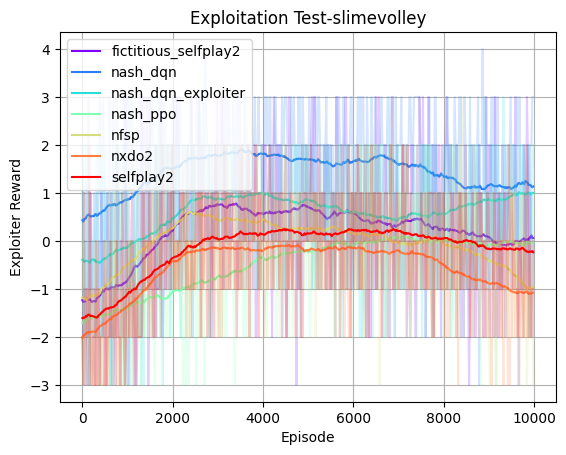

In [6]:
import os

envs = ['double_dunk', 'boxing', 'surround', 'pong', 'tennis', 'slimevolley']
index = '20220427_1507'
exploited_models = ['first', 'second']
times=  ['1']
for exploited_model in exploited_models:
    for t in times:
        os.makedirs(f'{index}_exploit/{exploited_model}_{t}', exist_ok=True)
        folder = f'../data/log/{index}_exploit_{exploited_model}_{t}/'
        files = ! ls $folder
        print(files)
        colors = cm.rainbow(np.linspace(0, 1, 7))
        # colors = ['r', 'b', 'c', 'orange', 'g', 'grey']
        if exploited_model == 'first':
            agent_to_plot = 'second_0'  # 'first_0' or 'second_0'
        else:
            agent_to_plot = 'first_0'

        for env in envs:
            env_files =[f for f in files if env in f]
            print(env_files)

            plt.clf()
            for f, c in zip(env_files, colors):
                data = load_data(f)
                method = re.split('v(\d+)_', f)[-1] # split with 'v*'
                plot(data['episode'], data['episode_reward'], method, c, agent_to_plot, smooth_radius=50)

            plt.legend()
            plt.grid()
            plt.title(f'Exploitation Test-{env}')
            plt.xlabel('Episode')
            plt.ylabel('Exploiter Reward')
            savepath=f'{index}_exploit/{exploited_model}_{t}/compare_exploitation_{env}.png'
            plt.savefig(savepath, bbox_inches='tight',)